# Mahsa Rezaei

# IBM Coursera Capstone Project's Report

## Contetnts:
### 1.	Introduction Section :
1.1 Discussion of the "background situation" leading to the problem at hand:

1.2 Problem to be resolved

1.3 Audience for this project.
### 2.	Data Section:
2.1 Data of Current Situation (current residence place)

2.2 Data required to resolve the problem

2.3 Data Derivation

2.4 How the data will be used to solve the problem

2.5 Mapping of Data



### 3.	Methodology section :
3.1 Process steps and strategy to resolve the problem


3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

### 4.	Results section:

Discussion of the results and how they help to take a decision.

4.1.	Discussion section

Elaboration and discussion on any observations and/or recommendations for improvement.

4.2.	Conclusion section

Desicison taken and Report Conclusion.
# 1. Introduction Section :
Discussion of the business problem and the audience who would be interested in this project.

## 1.1 Scenario and Background
I am a data scientist and a new mom currently residing in Iran. My husband and I plan to migrate to Toronto with our 6-month-old daughter, in less than three months. Migration seems to be difficult. However, things are much more complicated when you have a baby. Our number one concern is definitely finding the most suitable neighborhood which is appropriate for our new lifestyle with child (a neighborhood having lots of amenities nearby like health centres, parks and recreational centres, baby care centres, shopping centres, public transportation facilities…), while at the same time it is reasonably priced. We are really keen on finding the appropriate neighborhood and then apply for jobs based on that, as the place to live is our top-rank concern when having baby. Therefore, I decided to apply the learned skills during this Coursera certification to explore ways to make sure my decision is factual and rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it is more worthwhile doing it by myself with learned tools.

## 1.2 Problem to be resolved:
The challenge to resolve is being able to find a short time rental apartment unit in Toronto that offers the characteristics and benefits I mentioned earlier. Therefore, in order to set a basis for this problem, I want to find a rental unit subject to the following conditions:
1.	An entire home/apartment with monthly rent not to exceed $150/night
2.	Medium Availability (100days/year)
3.	Unit located within walking distance (<=1.0 mile, 1.6 km) from a subway metro station in Toronto
4.	Area with ammenities and venues mentioned earlier (at least one venue of each category ) within walking distance (<=1.0 mile, 1.6 km)

## 1.3 Interested Audience:
I believe this is a relevant project for a person or entity considering moving to a major city like Toronto, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.
# 2. Data Section:
Description of the data and its sources that will be used to solve the problem
## 2.1 Data of Toronto Boroughs and Neighborhoods:
As previously done in the lab, we can derive the Toronto boroughs and neighborhoods from the data of postal codes. Also, the subway list and Airbnb data on rentals are needed for this analysis.
## 2.2 Data Required to resolve the problem:
In order to make a good choice of an apartment in Toronto, the following data is required:
•	List/Information on neighborhoods form Toronto with their Geodata ( latitud and longitud.)
•	List/Information about the subway metro stations in Toronto with geodata. 
•	Listed apartments for rent in Toronto area with descriptions (price, location, address) 
•	Venues and ammenities in the Toronto neighborhoods (e.g. top 10) 2.3 sources and manipulation 
## 2.3. Data Derivation:
•	The list of Toronto neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping. 
df_toronto():
          

•	A list of Toronto subway metro stops was complied in Numbers (Apple excel) and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_Toronto_subway_stations).
•	for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorithm using Nominatim. Details will be shown in the execution of methodolody in section 3.0. The subway csv file is Toronto_subway.csv'" 

•	A list of places for short term rent was collected from Airbnb.com in Toronto http://insideairbnb.com/get-the-data.html .
A csv file was compiled with the rental place that indicated: areas of Toronto, address, home type, availability and monthly/night rental price. The csv file "Airbnb_rental_data.csv" had the following below structure. An algorithm was used to create all the geodata using Nominatim, as shown in section 3.0. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorithms used are shown in the execution of data in section 3.0 "Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 1.6 km radius. Foursquare is used to find the avenues at Toronto neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown.
## 2.4 How the data will be used to solve the problem
The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Toronto neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.
## 2.5 Mapping of Data
The following maps were created to facilitate the analysis and the choice of the palace to live. 
•	Toronto map of Neighborhoods 
•	Toronto subway metro locations 
•	Toronto map of places for rent 
•	Toronto map of clustered venues and neighborhoods 
•	Combined maps of Toronto rent places with subway locations 
•	Combined maps of Toronto rent places with subway locations and venues clusters


# 3. Methodology Section:

In [1]:
# importing necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


## 3.1. Processing(extracting raw table from webpage)

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
#print(url)
#print(result.status_code)
#print(result.headers)

will get data + clean it


In [3]:
soup = BeautifulSoup(result.content, 'html.parser')
table = soup.find('table')
trs = table.find_all('tr')
rows = []
for tr in trs:
    i = tr.find_all('td')
    if i:
        rows.append(i)
        
lst = []
for row in rows:
    postalcode = row[0].text.rstrip()
    borough = row[1].text.rstrip()
    neighborhood = row[2].text.rstrip()
    if borough != 'Not assigned':
        if neighborhood == 'Not assigned':
            neighborhood = borough
        lst.append([postalcode, borough, neighborhood])

lst

[['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village'],
 ['M5A', 'Downtown Toronto', 'Harbourfront'],
 ['M5A', 'Downtown Toronto', 'Regent Park'],
 ['M6A', 'North York', 'Lawrence Heights'],
 ['M6A', 'North York', 'Lawrence Manor'],
 ['M7A', "Queen's Park", "Queen's Park"],
 ['M9A', 'Etobicoke', 'Islington Avenue'],
 ['M1B', 'Scarborough', 'Rouge'],
 ['M1B', 'Scarborough', 'Malvern'],
 ['M3B', 'North York', 'Don Mills North'],
 ['M4B', 'East York', 'Woodbine Gardens'],
 ['M4B', 'East York', 'Parkview Hill'],
 ['M5B', 'Downtown Toronto', 'Ryerson'],
 ['M5B', 'Downtown Toronto', 'Garden District'],
 ['M6B', 'North York', 'Glencairn'],
 ['M9B', 'Etobicoke', 'Cloverdale'],
 ['M9B', 'Etobicoke', 'Islington'],
 ['M9B', 'Etobicoke', 'Martin Grove'],
 ['M9B', 'Etobicoke', 'Princess Gardens'],
 ['M9B', 'Etobicoke', 'West Deane Park'],
 ['M1C', 'Scarborough', 'Highland Creek'],
 ['M1C', 'Scarborough', 'Rouge Hill'],
 ['M1C', 'Scarborough', 'Port Union'],
 ['M3C', 'North 

convert into a dataframe


In [4]:
cols = ['PostalCode', 'Borough', 'Neighborhood']
df_toronto = pd.DataFrame(lst, columns=cols)
print(df_toronto.shape)
# df[df.duplicated(['PostalCode'], keep=False)] - this would have shown the duplicate PostalCodes

(211, 3)


custom groupby / agg to merge Neighborhoods
groupby PostalCode, keep the first Borough and join() Neighborhoods

In [5]:
df_toronto = df_toronto.groupby('PostalCode').agg(
    {
        'Borough':'first', 
        'Neighborhood': ', '.join,}
    ).reset_index()

In [6]:
df_toronto.shape

(103, 3)

## 3.2. Processing (Extracting Latitude and Longtitude for each Postal code in Toronto)

In [7]:
df_toronto.to_csv('Toronto1_df.csv',index=False)

In [8]:
Toronto1_df = "Toronto1_df.csv"
TorontoPostalCodes = pd.read_csv(Toronto1_df).set_index("PostalCode")
TorontoPostalCodes.rename_axis("Postal Code", axis='index', inplace=True)
TorontoPostalCodes.head()

,Borough,Neighborhood
Postal Code,,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [9]:
toronto_geocsv = 'https://cocl.us/Geospatial_data'
!wget -q -O 'toronto_m.geospatial_data.csv' toronto_geocsv
geocsv_data = pd.read_csv(toronto_geocsv).set_index("Postal Code")
geocsv_data.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


Combining Two data frames with mapped postcodes


In [10]:
toronto_neighborhoods = TorontoPostalCodes.join(geocsv_data)
toronto_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
Postal Code,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [11]:
toronto_neighborhoods.to_csv('Toronto_N_df.csv',index=False)

In [12]:
toronto_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
Postal Code,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476
M1J,Scarborough,Scarborough Village,43.744734,-79.239476
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476


## 3.3. Create a map of Toronto

In [13]:
# for the city Toronto, latitude and longtitude are manually extracted via google search
toronto_latitude = 43.6532; toronto_longitude = -79.3832
map_toronto = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 10.7)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Borough'], toronto_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    

map_toronto

In [14]:
# @hiddel_cell
CLIENT_ID = '0MJA3NYYG3U2ZY1LTZN2OYEHS3Y3WVSON2GBSO3IL4EDYVIR' # your Foursquare ID
CLIENT_SECRET = 'WGWSAF2TKVUQPE3PD0N3EOITFVBY5EYP1VCZI3BMUG0ROUS5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_neighborhoods['Borough'].unique()),
        toronto_neighborhoods.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


### 3.3.1:Scarborough and its neighbourhoods

In [16]:
scarborough_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


In [17]:
scarborough_data.shape

(17, 4)

In [18]:
address_scar = 'Scarborough,Toronto'
latitude_scar = 43.773077
longitude_scar = -79.257774
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude_scar, longitude_scar))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


In [19]:
map_scarb = folium.Map(location=[latitude_scar, longitude_scar], zoom_start=12)

# add markers to map
for lat, lng, label in zip(scarborough_data['Latitude'], scarborough_data['Longitude'], scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_scarb)  
    
map_scarb

### 3.3.2: North York and its neighbourhoods

In [20]:
northyork_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'North York'].reset_index(drop=True)
northyork_data.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,North York,Hillcrest Village,43.803762,-79.363452
1,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,North York,Bayview Village,43.786947,-79.385975
3,North York,"Silver Hills, York Mills",43.757490,-79.374714
4,North York,"Newtonbrook, Willowdale",43.789053,-79.408493


In [21]:
northyork_data.shape

(24, 4)

In [22]:
address_ny = 'North York,Toronto'
latitude_ny = 43.7615
longitude_ny = -79.4111
print('The geograpical coordinate of North York are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of North York are 43.7615, -79.4111.


In [23]:
map_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=12)

# add markers to map
for lat, lng, label in zip(northyork_data['Latitude'], northyork_data['Longitude'], northyork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ny)  
    
map_ny

### 3.3.3: Etobicoke and its neighbourhoods

In [24]:
etobicoke_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321
1,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484
2,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
3,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509
4,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",43.628841,-79.520999
5,Etobicoke,Islington Avenue,43.667856,-79.532242
6,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724


In [25]:
etobicoke_data.shape

(12, 4)

In [26]:
address_et = 'Etobicoke,Toronto'
latitude_et = 43.6205
longitude_et = -79.5132
print('The geograpical coordinate of Etobicoke are {}, {}.'.format(latitude_et, longitude_et))

The geograpical coordinate of Etobicoke are 43.6205, -79.5132.


In [27]:
map_et = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=12)

# add markers to map
for lat, lng, label in zip(etobicoke_data['Latitude'], etobicoke_data['Longitude'], etobicoke_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_et)  
    
map_et

### 3.3.4: East York and its neighbourhoods

In [28]:
eastyork_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'East York'].reset_index(drop=True)
eastyork_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
1,East York,Woodbine Heights,43.695344,-79.318389
2,East York,Leaside,43.709060,-79.363452
3,East York,Thorncliffe Park,43.705369,-79.349372
4,East York,East Toronto,43.685347,-79.338106


In [29]:
eastyork_data.shape

(5, 4)

In [30]:
address_ey = 'East York,Toronto'
latitude_ey = 43.6912
longitude_ey = -79.3417
print('The geograpical coordinate of East York are {}, {}.'.format(latitude_ey, longitude_ey))

The geograpical coordinate of East York are 43.6912, -79.3417.


In [31]:
map_ey = folium.Map(location=[latitude_ey, longitude_ey], zoom_start=12)

# add markers to map
for lat, lng, label in zip(eastyork_data['Latitude'], eastyork_data['Longitude'], eastyork_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ey)  
    
map_ey

### 3.3.5: Downtown and its neighbourhoods

In [32]:
downtown_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
5,Downtown Toronto,St. James Town,43.651494,-79.375418
6,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [33]:
downtown_data.shape

(18, 4)

In [34]:
address_dt = 'Downtown Toronto,Toronto'
latitude_dt = 43.6543
longitude_dt = -79.3860
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude_dt, longitude_dt))

The geograpical coordinate of Downtown Toronto are 43.6543, -79.386.


In [35]:
map_dt = folium.Map(location=[latitude_dt, longitude_dt], zoom_start=12)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dt)  
    
map_dt

### 3.3.6: York and its neighbourhoods

In [36]:
york_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'York'].reset_index(drop=True)
york_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,York,Humewood-Cedarvale,43.693781,-79.428191
1,York,Caledonia-Fairbanks,43.689026,-79.453512
2,York,"Del Ray, Keelesdale, Mount Dennis, Silverthorn",43.691116,-79.476013
3,York,"The Junction North, Runnymede",43.673185,-79.487262
4,York,Weston,43.706876,-79.518188


In [37]:
address_y = 'York,Toronto'
latitude_y = 43.6543
longitude_y = -79.3860
print('The geograpical coordinate of York are {}, {}.'.format(latitude_y, longitude_y))

The geograpical coordinate of York are 43.6543, -79.386.


In [38]:
york_data.shape

(5, 4)

In [39]:
map_york = folium.Map(location=[latitude_y, longitude_y], zoom_start=12)

# add markers to map
for lat, lng, label in zip(york_data['Latitude'], york_data['Longitude'], york_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_york)  
    
map_york

### 3.3.7: East Toronto and its neighbourhoods

In [40]:
easttoronto_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'East Toronto'].reset_index(drop=True)
easttoronto_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


In [41]:
address_et = 'East Toronto,Toronto'
latitude_et = 43.6780
longitude_et = -79.3099
print('The geograpical coordinate of East Toronto are {}, {}.'.format(latitude_et, longitude_et))

The geograpical coordinate of East Toronto are 43.678, -79.3099.


In [42]:
easttoronto_data.shape

(5, 4)

In [43]:
map_et = folium.Map(location=[latitude_et, longitude_et], zoom_start=12)

# add markers to map
for lat, lng, label in zip(easttoronto_data['Latitude'], easttoronto_data['Longitude'], easttoronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_et)  
    
map_et

### 3.3.8: Central Toronto and its neighbourhoods

In [44]:
centraltoronto_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'Central Toronto'].reset_index(drop=True)
centraltoronto_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,Lawrence Park,43.728020,-79.388790
1,Central Toronto,Davisville North,43.712751,-79.390197
2,Central Toronto,North Toronto West,43.715383,-79.405678
3,Central Toronto,Davisville,43.704324,-79.388790
4,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049
6,Central Toronto,Roselawn,43.711695,-79.416936


In [45]:
address_ct = 'Central Toronto,Toronto'
latitude_ct = 43.6577
longitude_ct = -79.4216
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude_ct, longitude_ct))

The geograpical coordinate of Central Toronto are 43.6577, -79.4216.


In [46]:
centraltoronto_data.shape

(9, 4)

In [47]:
map_ct= folium.Map(location=[latitude_ct, longitude_ct], zoom_start=12)

# add markers to map
for lat, lng, label in zip(centraltoronto_data['Latitude'], centraltoronto_data['Longitude'], centraltoronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_ct)  
    
map_ct

### 3.3.9: Queen's Park and its neighbourhoods

In [48]:
queenspark_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == "Queen's Park"].reset_index(drop=True)
queenspark_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,Queen's Park,Queen's Park,43.662301,-79.389494


In [49]:
address_qp = 'Queens Park,Toronto'
latitude_qp = 43.6644
longitude_qp = -79.3923
print('The geograpical coordinate of Queens Park are {}, {}.'.format(latitude_qp, longitude_qp))

The geograpical coordinate of Queens Park are 43.6644, -79.3923.


In [50]:
queenspark_data.shape

(1, 4)

In [51]:
map_qp = folium.Map(location=[latitude_qp, longitude_qp], zoom_start=12)

# add markers to map
for lat, lng, label in zip(queenspark_data['Latitude'], queenspark_data['Longitude'], queenspark_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_qp)  
    
map_qp

### 3.3.10: West Toronto and its neighbourhoods

In [52]:
westtoronto_data = toronto_neighborhoods[toronto_neighborhoods['Borough'] == 'West Toronto'].reset_index(drop=True)
westtoronto_data.head(7)

,Borough,Neighborhood,Latitude,Longitude
0,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259
1,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
2,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191
3,West Toronto,"High Park, The Junction South",43.661608,-79.464763
4,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
5,West Toronto,"Runnymede, Swansea",43.651571,-79.484450


In [53]:
address_wt = 'West Toronto,Toronto'
latitude_wt = 43.6534
longitude_wt = -79.4259
print('The geograpical coordinate of West Toronto are {}, {}.'.format(latitude_wt, longitude_wt))

The geograpical coordinate of West Toronto are 43.6534, -79.4259.


In [54]:
westtoronto_data.shape

(6, 4)

In [55]:
map_wt = folium.Map(location=[latitude_wt, longitude_wt], zoom_start=12)

# add markers to map
for lat, lng, label in zip(westtoronto_data['Latitude'], westtoronto_data['Longitude'], westtoronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_wt)  
    
map_wt

## 3.4.1: Exploring Neighborhoods in Toronto

A function to repeat the same process to all the neighborhoods in Toronto

In [56]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [57]:
toronto_venues = getNearbyVenues(names=toronto_neighborhoods['Neighborhood'],
                                   latitudes=toronto_neighborhoods['Latitude'],
                                   longitudes=toronto_neighborhoods['Longitude']
                                )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [58]:
print(toronto_venues.shape)
toronto_venues.head()

(4885, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store
3,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Harvey's,43.800106,-79.198258,Fast Food Restaurant


How many venues were returned for each neighborhood?

In [59]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,49,49,49,49,49,49
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",25,25,25,25,25,25
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",17,17,17,17,17,17
"Alderwood, Long Branch",25,25,25,25,25,25
"Bathurst Manor, Downsview North, Wilson Heights",30,30,30,30,30,30
Bayview Village,13,13,13,13,13,13
"Bedford Park, Lawrence Manor East",39,39,39,39,39,39
Berczy Park,100,100,100,100,100,100


How many unique categories can be curated from all the returned venues?

In [60]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 335 uniques categories.


<a id='item3'></a>

## 3.4.2: Analyze Each Neighborhood

In [61]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating R

And let's examine the new dataframe size.

In [62]:
toronto_onehot.shape

(4885, 335)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [63]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating R

The new size

In [64]:
toronto_grouped.shape

(102, 335)

Print each neighborhood along with the top 5 most common venues

In [65]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.07
1             Hotel  0.05
2              Café  0.05
3           Theater  0.04
4  Sushi Restaurant  0.03


----Agincourt----
                venue  freq
0  Chinese Restaurant  0.16
1       Shopping Mall  0.08
2              Bakery  0.04
3         Supermarket  0.04
4         Pizza Place  0.04


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                venue  freq
0  Chinese Restaurant  0.24
1                Park  0.08
2              Bakery  0.08
3         Pizza Place  0.08
4    Malay Restaurant  0.04


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
            venue  freq
0     Pizza Place  0.24
1   Grocery Store  0.18
2     Video Store  0.06
3            Park  0.06
4  Sandwich Place  0.06


----Alderwood, Long Branch----
            venue  freq
0  Discount Store  0.12
1   Grocery Store  0.08
2            Park  

Put that into a *pandas* dataframe

A function to sort the venues in descending order.

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood.

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted=[]
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(102)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Hotel,Theater,Steakhouse,Sushi Restaurant,Gym,Asian Restaurant,Beer Bar,Restaurant
1,Agincourt,Chinese Restaurant,Shopping Mall,Coffee Shop,Bakery,Caribbean Restaurant,Supermarket,Pizza Place,Sandwich Place,Lounge,Indian Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Bakery,Pizza Place,Park,Hobby Shop,Gym,Korean Restaurant,Shop & Service,Caribbean Restaurant,Dessert Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Fried Chicken Joint,Bus Line,Fast Food Restaurant,Beer Store,Pharmacy,Sandwich Place,Video Store,Park
4,"Alderwood, Long Branch",Discount Store,Park,Pizza Place,Pharmacy,Grocery Store,Gym,Donut Shop,Intersection,Skating Rink,Trail
5,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Pizza Place,Supermarket,Diner,Bank,Frozen Yogurt Shop,Fried Chicken Joint,Sushi Restaurant,Sandwich Place,Fast Food Restaurant
6,Bayview Village,Bank,Japanese Restaurant,Intersection,Fast Food Restaurant,Chinese Restaurant,Café,Park,Skating Rink,Skate Park,Grocery Store
7,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Fast Food Restaurant,Frozen Yogurt Shop,Intersection,Bagel Shop,Bakery,Bank,Sushi Restaurant,Restaurant
8,Berczy Park,Coffee Shop,Hotel,Café,Beer Bar,Japanese Restaurant,Restaurant,Bakery,Cocktail Bar,Park,Steakhouse
9,"Birch Cliff, Cliffside West",Park,Thai Restaurant,Café,Gym,Asian Restaurant,Gym Pool,Skating Rink,Restaurant,Diner,Discount Store


## 3.4.3: Exploring North York

After examining information above , I concluded that "York Mills" neighborhood meets most of my expectations, therefore providing guidance as to where to look for the future apartment .

In [68]:
neighborhood_latitude = northyork_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighborhood_longitude = northyork_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighborhood_name = northyork_data.loc[0, 'Neighborhood'] # neighbourhood name

print('Latitude and longitude values of "{}" are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of "Hillcrest Village" are 43.8037622, -79.3634517.


In [69]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_y, longitude_y, VERSION, radius, LIMIT)

In [70]:
results = requests.get(url).json()
#results

function that extracts the category of the venue - borrow from the Foursquare lab.

In [71]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [72]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(100, 4)

<a id='item4'></a>

## 3.5.1: Apartment Rentals

Examine a paticular Neighborhood - print venues

I will put them in one matrix

In [73]:
xx=neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == 'York Mills West']
xx.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
101,York Mills West,Tennis Court,Park,Restaurant,Bowling Alley,Pet Store,Bank,Dog Run,Diner,Business Service,French Restaurant


Map of Toronto places for rent
Several Toronto real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the process.

In [74]:
import pandas as pd # library for data analsysis

# Read csv file with clustered neighborhoods with geodat
airbnb_rental_data  = pd.read_csv('listings.csv') 
#airbnb_rental_data.head(20)

In [75]:
airbnb_rental_data.shape

(20769, 16)

Toronto apartment rent price statistics
A US 250 Dollar per night rent is actually around the mean value 

In [76]:
import seaborn as sns
sns.distplot(airbnb_rental_data['price'],bins=15)

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


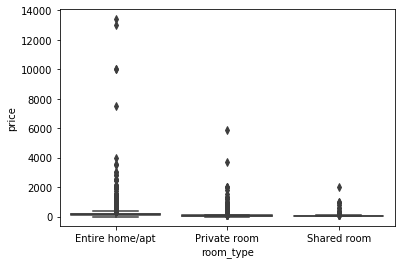

In [77]:
sns.boxplot(x='room_type', y= 'price', data=airbnb_rental_data)

Toronto apartment rent price statistics for York Mills Neighbourhood:

It seems that the prices are more reasonable in this neighbourhood!

In [78]:
airbnb_rental_data_yorkmills=airbnb_rental_data[airbnb_rental_data['neighbourhood']=='Bridle Path-Sunnybrook-York Mills']

In [79]:
airbnb_rental_data_yorkmills.shape

(33, 16)

There are 33 listings (apartment rental cases)available in airbnb in the York Mills:

In [80]:
airbnb_rental_data.head(33)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,468,4,7,2017-12-04,0.15,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,100,180,169,2013-08-27,1.42,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,67,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,209,2019-04-23,1.90,2,223
4,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,37,2019-05-14,0.36,7,321
5,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,54,120,26,2011-08-30,0.24,1,0
6,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64151,-79.37643,Entire home/apt,134,180,1,2010-08-11,0.01,2,365
7,40456,Downtown 2 Bdr.Apt with King Size Bed and Par...,174063,Denis,NaN,South Parkdale,43.63532,-79.44049,Entire home/apt,150,30,101,2019-05-05,0.94,3,351
8,41887,Great location,183071,Kyle,NaN,Oakridge,43.69458,-79.28681,Entire home/apt,70,2,80,2019-06-01,2.60,2,278
9,43964,Bright entire 2-bedrm basement suite private e...,192364,Mitra,NaN,Wexford/Maryvale,43.74858,-79.29111,Entire home/apt,90,2,26,2019-05-03,0.88,1,335


/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


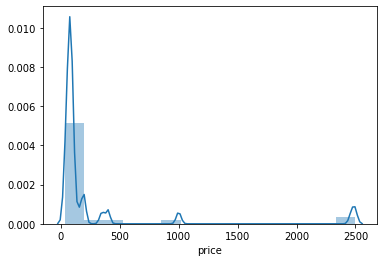

In [81]:
import seaborn as sns
sns.distplot(airbnb_rental_data_yorkmills['price'],bins=15)

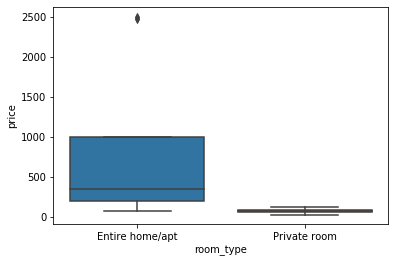

In [82]:
sns.boxplot(x='room_type', y= 'price', data=airbnb_rental_data_yorkmills)

In [83]:
airbnb_rental_data=airbnb_rental_data_yorkmills

So there are 33 listings for apartment rental in York mills neighbourhood

## 3.5.2: Mapping Toronto(North York) Subway locations:

Toronto subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. 

Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station

In [84]:
# create map of Toronto using latitude and longitude values from Nominatim
latitude= latitude_ny
longitude= longitude_ny

map_toronto_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(airbnb_rental_data['latitude'],airbnb_rental_data['longitude'],'$ ' + airbnb_rental_data['price'].astype(str)+ airbnb_rental_data['room_type']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_rent)   
    

# add markers of subway locations to map    
    
# sheppard west subwaystation
sheppard_lat=43.7497
sheppard_lon= -79.4619

# York Mills station
yorkmills_lat= 43.4439 
yorkmills_lon= -79.2424
    
#North York Centre staton
northyork_lat=43.7687
northyork_lon=-79.4125
    
#finch station
finch_lat=43.7814
finch_lon=-79.4150
    
#Bessarian station
bessarian_lat=43.7691
bessarian_lon=-79.3759
    
#leslie station
leslie_lat=43.7713 
leslie_lon=-79.3648
    
#don mills station
donmills_lat=43.7757 
donmills_lon=-79.3454
    
#bayview station
bayview_lat=43.7669 
bayview_lon=-79.3863
    
#wilson station
wilson_lat=43.7345 
wilson_lon=-79.4501
    
#yorkdale station
yorkdale_lat=43.7246
yorkdale_lon=-79.4475

#Downsview Park station
downsview_lat=43.7536
downsview_lon=-79.4788

#Pioneer village station
pioneervil_lat=43.7772
pioneervil_lon=-79.5103

#Vaughan Metropolitan centre station
vaughan_lat=43.7942
vaughan_lon=-79.5275

#Eglinton West station
eglinton_lat=43.6994
eglinton_lon=-79.4361

#Chester station
chester_lat=43.6782
chester_lon=-79.3525

#Dupont station
dupont_lat=43.6749
dupont_lon=-79.4071

stations_around_yorkmills=[]
lat_stations=[]
lon_stations=[]
lat_stations=[dupont_lat,chester_lat,eglinton_lat,vaughan_lat,pioneervil_lat,downsview_lat,sheppard_lat,yorkmills_lat,northyork_lat,finch_lat,bessarian_lat,leslie_lat,donmills_lat,bayview_lat,wilson_lat,yorkdale_lat]
lon_stations=[dupont_lon,chester_lon,eglinton_lon,vaughan_lon,pioneervil_lon,downsview_lon,sheppard_lon,yorkmills_lon,northyork_lon,finch_lon,bessarian_lon,leslie_lon,donmills_lon,bayview_lon,wilson_lon,yorkdale_lon]
stations_around_yorkmills=['Dupont','Chester','Eglinton West','Vaughan Metropolitan Centre','Pioneer Village','Downsview Park','sheppard','york mills','north york centre','finch','bessarian','leslie','don mills','bayview','wilson','york dale']

for lat, lng, label in zip(lat_stations, lon_stations,  stations_around_yorkmills ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_toronto_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_toronto_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_toronto_rent)

map_toronto_rent

# 4. Results Section:

the apartment rental listing above which is shown in the map, meets all the considerations we needed. Just we need to find the nearest listing to a subway station.


## 4.1.Discussion Section:

The nearest among all are the ones mentioned in the following:

1. Entire home/apartment with $ 400 per night's price and a distance of 2.872 km from the North york station


2. private room with $ 119 per night and a distance of 2.897 km from Yorkdale station


## 4.2.Conclusion Section:


Based on the above results, the first case best fulfills our needs.